Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
# Import Yahoo finance python
!pip install yfinance
import yfinance as yf

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Load the data from github
url = 'https://raw.githubusercontent.com/laguz/stock_csv/master/AAPL.csv'
df = pd.read_csv(url)

In [4]:
# Take a look at the data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0


In [5]:
# Add the price change feature
df['Price_Change'] = df['Close'] - df['Close'].shift(1)

In [6]:
# Add the price change feature
df['Volume_Change'] = df['Volume'] - df['Volume'].shift(1)

In [7]:
# Add the price change feature
df['Percentage_Change'] = (((df['Close'] / df['Close'].shift(1))-1)*100)

In [8]:
# Drop the any create from the three features from above
df.dropna(how='any', inplace=True)

In [9]:
# Convert the Date column into time data type
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
# Create the target feature to predict.
# I want to know if the market up or down.
df.loc[df['Price_Change'] >= 0, 'Up_Down'] = 1
df.loc[df['Price_Change'] < 0, 'Up_Down'] = 0
df['Up_Down'] = df['Up_Down'].astype('int')
df['Up_Down'].value_counts(normalize=True)

1    0.532284
0    0.467716
Name: Up_Down, dtype: float64

In [11]:
# Choose your target. Which column in your tabular dataset will you predict?
# I will predict Up_Down

In [12]:
# Is your problem regression or classification?
# It will be a regression

In [13]:
# How is your target distributed?
# The majority class frequency is 53%

In [14]:
# My evaluation metrics.
# Accuracy and Mean Absolute Error

In [15]:
# I will train from 1980 to 2004, validate from 2005 to 2014, and test from 2015 to 2019
# I will do time base split.
train = df[(df['Date'].dt.year <= 2004)]
val = df[(df['Date'].dt.year >= 2005) & (df['Date'].dt.year <= 2014)]
test = df[(df['Date'].dt.year >= 2015)]

In [16]:
####################### Fisnish retro 1 ####################

In [17]:
####################### Start retro 2 ####################

In [18]:
# Take a look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10036 entries, 1 to 10038
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               10036 non-null  datetime64[ns]
 1   Open               10036 non-null  float64       
 2   High               10036 non-null  float64       
 3   Low                10036 non-null  float64       
 4   Close              10036 non-null  float64       
 5   Adj Close          10036 non-null  float64       
 6   Volume             10036 non-null  float64       
 7   Price_Change       10036 non-null  float64       
 8   Volume_Change      10036 non-null  float64       
 9   Percentage_Change  10036 non-null  float64       
 10  Up_Down            10036 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 940.9 KB


In [19]:
# Take a look at the data again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10036 entries, 1 to 10038
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               10036 non-null  datetime64[ns]
 1   Open               10036 non-null  float64       
 2   High               10036 non-null  float64       
 3   Low                10036 non-null  float64       
 4   Close              10036 non-null  float64       
 5   Adj Close          10036 non-null  float64       
 6   Volume             10036 non-null  float64       
 7   Price_Change       10036 non-null  float64       
 8   Volume_Change      10036 non-null  float64       
 9   Percentage_Change  10036 non-null  float64       
 10  Up_Down            10036 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 940.9 KB


In [20]:
####################### Fisnish retro 2 ####################

In [21]:
####################### Start retro 3 ####################

In [22]:
# Baseline
baseline = train['Up_Down'].value_counts(normalize=True)
print('Majority Baseline:', baseline[1])

Majority Baseline: 0.5320481133629923


In [23]:
# Create the new DataFrame to get the feature list
target = 'Up_Down'
df_drop = train.copy()

# Features DataFrame (I found leakage in the engenier feature Price_Change and Percentage_change)
features = df_drop.drop([target, 'Price_Change', 'Percentage_Change','Date'], axis=1)

# get the feature columns list
numeric = features.describe().columns.values.tolist()

In [24]:
# Processor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier


numeric_features = numeric

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])


clf = Pipeline(steps=[('preprocessor', preprocessor),
                  ('classifier', DecisionTreeClassifier())])

In [25]:
# Create the feature matrix 
X = features

# Create and encode the target array
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
y=label_enc.fit_transform(train['Up_Down'])

# Import the train_test_split utility
from sklearn.model_selection import train_test_split

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Fit the model
clf.fit(X_train,y_train)
print('Validation Accuracy', clf.score(X_test, y_test))

Validation Accuracy 0.7174629324546952


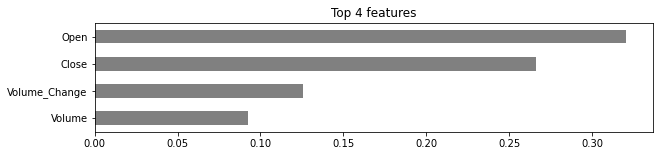

In [26]:
# Features (order in which they were preprocessed)
features_order = numeric_features

importances = pd.Series(clf.steps[1][1].feature_importances_, features_order)

# Plot feature importances
import matplotlib.pyplot as plt

n = 4
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey')

plt.show()

In [27]:
# Permute the values in the more important column
feature = 'Open'

X_test_permuted = X_test.copy()

# Fill in missing values
X_test_permuted[feature].fillna(value = X_test_permuted[feature].median(), inplace=True)

# Permute
X_test_permuted[feature] = np.random.permutation(X_test[feature])

print('Feature permuted: ', feature)
print('Validation Accuracy', clf.score(X_test, y_test))
print('Validation Accuracy (permuted)', clf.score(X_test_permuted, y_test))

Feature permuted:  Open
Validation Accuracy 0.7174629324546952
Validation Accuracy (permuted) 0.5074135090609555


In [28]:
# Permute the values in the more important column
feature = 'Volume'

X_test_permuted = X_test.copy()

# Fill in missing values
X_test_permuted[feature].fillna(value = X_test_permuted[feature].median(), inplace=True)

# Permute
X_test_permuted[feature] = np.random.permutation(X_test[feature])

print('Feature permuted: ', feature)
print('Validation Accuracy', clf.score(X_test, y_test))
print('Validation Accuracy (permuted)', clf.score(X_test_permuted, y_test))

Feature permuted:  Volume
Validation Accuracy 0.7174629324546952
Validation Accuracy (permuted) 0.7018121911037891


In [29]:
# Load xgboost and fit the model
from xgboost import XGBClassifier

xg_classifier = XGBClassifier(n_estimators=50, random_state=42)

xg_classifier.fit(X_train,y_train)

print('Validation Accuracy: XGBoost', xg_classifier.score(X_test, y_test))

Validation Accuracy: XGBoost 0.6754530477759473


In [ ]:
####################### Fisnish retro 3 ####################

In [ ]:
####################### Start retro 4 ####################

In [ ]:
####################### Fisnish retro 4 ####################